In [1]:
from fastai.vision import *

In [2]:
#defining classes
classes = ['shoes','skates','rollerblades', 'soccer_shoes']

In [3]:
cd D:\\Zee\\Data Science\\fastai\\footwear

D:\Zee\Data Science\fastai\footwear


creating directory for not cleaned data

In [5]:
mkdir NotClean

downloading same images on Colab machine

In [6]:
path = Path('D:\\Zee\\Data Science\\fastai\\footwear\\NotClean')
folders = ['soccer_shoes', 'shoes', 'skates', 'rollerblades']
for folder in folders:
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

In [7]:
dest_soccer_shoes = 'D:/Zee/Data Science/fastai/footwear/NotClean/soccer_shoes'
dest_shoes = 'D:/Zee/Data Science/fastai/footwear/NotClean/shoes'
dest_rollerblades = 'D:/Zee/Data Science/fastai/footwear/NotClean/rollerblades'
dest_skates = 'D:/Zee/Data Science/fastai/footwear/NotClean/skates'

In [8]:
path_soccer_shoes = 'D:/Zee/Data Science/fastai/footwear/url_soccer_shoes.txt'
path_shoes = 'D:/Zee/Data Science/fastai/footwear/url_shoes.txt'
path_rollerblades = 'D:/Zee/Data Science/fastai/footwear/url_rollerblades.txt'
path_skates = 'D:/Zee/Data Science/fastai/footwear/url_skates.txt'

In [9]:
download_images(path_soccer_shoes, dest_soccer_shoes, max_pics = 200)
download_images(path_shoes, dest_shoes, max_pics = 200)
download_images(path_rollerblades, dest_rollerblades, max_pics = 200)
download_images(path_skates, dest_skates, max_pics = 200)

In [10]:
#some of the images have error, making sure only images that can be opened is there, otherwise deleted
path = 'D:\\Zee\\Data Science\\fastai\\footwear\\NotClean'
classes = ['soccer_shoes', 'shoes', 'skates', 'rollerblades']
for c in classes:
    print(c)
    verify_images(path+c, delete=True, max_size=500)

soccer_shoes
shoes
skates
rollerblades


In [11]:
path = 'D:\\Zee\\Data Science\\fastai\\footwear\\NotClean'
path = path.replace('\\','/')
path

'D:/Zee/Data Science/fastai/footwear/NotClean'

In [12]:
np.random.seed(1)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [13]:
data.classes

['rollerblades', 'shoes', 'skates', 'soccer_shoes']

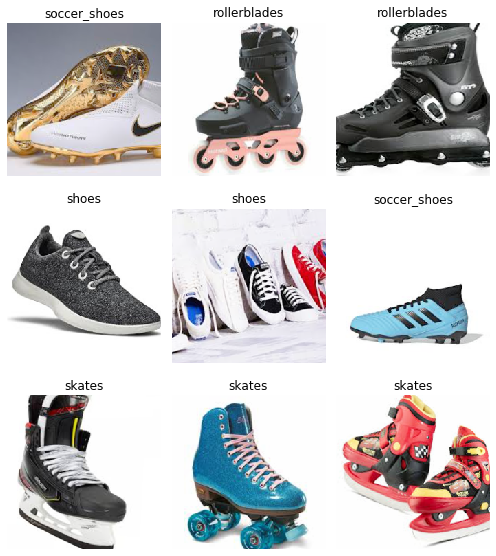

In [14]:
data.show_batch(rows=3, figsize=(7, 8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['rollerblades', 'shoes', 'skates', 'soccer_shoes'], 4, 256, 64)

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [17]:
#loading the fitted model originated in Colab
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (256 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rollerblades,rollerblades,rollerblades,rollerblades,rollerblades
Path: D:\Zee\Data Science\fastai\footwear\NotClean;

Valid: LabelList (64 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
shoes,shoes,shoes,shoes,shoes
Path: D:\Zee\Data Science\fastai\footwear\NotClean;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

In [19]:
from fastai.widgets import *

In [20]:
losses, idxs = interp.top_losses()
top_losses_paths = data.train_ds.x[idxs.tolist()]

In [21]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [22]:
path

'D:/Zee/Data Science/fastai/footwear/NotClean'

In [23]:
fd = ImageCleaner(ds, idxs.tolist(), path)

'No images to show :)'

cleaned.csv file is created, should be uploaded to pick the cleaned data.

In [24]:
cleanedcsv_path = 'D:\\Zee\\Data Science\\fastai\\footwear\\NotClean\\cleaned.csv'
df_cleaned = pd.read_csv(cleanedcsv_path)
df_cleaned.head()

,name,label
0,rollerblades\00000000.jpg,rollerblades
1,rollerblades\00000001.jpg,rollerblades
2,rollerblades\00000022.jpg,rollerblades
3,rollerblades\00000023.jpg,rollerblades
4,rollerblades\00000025.jpg,rollerblades


In [25]:
#preparing paths
df_cleaned.name = df_cleaned.name.apply(lambda x:x.replace('\\', '/'))

In [26]:
#splitting data into training and validation sets
from sklearn.model_selection import train_test_split

train, valid = train_test_split(df_cleaned, test_size = 0.2, random_state = 1)

In [27]:
train.head()

,name,label
170,skates/00000059.jpg,rollerblades
159,skates/00000045.jpg,skates
181,skates/00000074.jpg,rollerblades
147,skates/00000033.jpg,rollerblades
150,skates/00000036.jpg,skates


In [28]:
valid.head()

,name,label
67,shoes/00000002.jpg,shoes
247,soccer_shoes/00000095.jpg,soccer_shoes
210,soccer_shoes/00000051.jpg,soccer_shoes
224,soccer_shoes/00000068.jpg,soccer_shoes
90,shoes/00000034.jpg,shoes


Preparing clean data.

In [29]:
cd D:\\Zee\\Data Science\\fastai\\footwear

D:\Zee\Data Science\fastai\footwear


In [30]:
mkdir CleanImages

In [31]:
cd CleanImages

D:\Zee\Data Science\fastai\footwear\CleanImages


In [32]:
mkdir train

In [33]:
cd train

D:\Zee\Data Science\fastai\footwear\CleanImages\train


In [34]:
classes = ['rollerblades', 'soccer_shoes', 'shoes', 'skates']
for c in classes:
    os.system('mkdir {}'.format(c))

In [35]:
cd ..

D:\Zee\Data Science\fastai\footwear\CleanImages


In [36]:
mkdir valid

In [37]:
cd valid

D:\Zee\Data Science\fastai\footwear\CleanImages\valid


In [38]:
classes = ['rollerblades', 'soccer_shoes', 'shoes', 'skates']
for c in classes:
    os.system('mkdir {}'.format(c))

In [39]:
cd ..

D:\Zee\Data Science\fastai\footwear\CleanImages


In [40]:
path = 'D:/Zee/Data Science/fastai/footwear/NotClean/'

train clean data to be selected

In [41]:
shoe_list = train[train.label == 'shoes'].name.apply(lambda x: path+x).tolist()
skate_list = train[train.label == 'skates'].name.apply(lambda x: path+x).tolist()
soccer_shoe_list = train[train.label == 'soccer_shoes'].name.apply(lambda x: path+x).tolist()
rollerblade_list = train[train.label == 'rollerblades'].name.apply(lambda x: path+x).tolist()

In [42]:
from shutil import copy
#copying only the clean images
shoes_path = 'D:/Zee/Data Science/fastai/footwear/CleanImages/train/shoes/'
for shoe in shoe_list:
    copy(shoe, shoes_path)

skates_path = 'D:/Zee/Data Science/fastai/footwear/CleanImages/train/skates/'
for skate in skate_list:
    copy(skate, skates_path)
    
soccer_shoes_path = 'D:/Zee/Data Science/fastai/footwear/CleanImages/train/soccer_shoes/'
for soccer_shoe in soccer_shoe_list:
    copy(soccer_shoe, soccer_shoes_path)
    
rollerblades_path = 'D:/Zee/Data Science/fastai/footwear/CleanImages/train/rollerblades/'
for rollerblade in rollerblade_list:
    copy(rollerblade, rollerblades_path)

valid clean data to be selected

In [43]:
shoe_list = valid[valid.label == 'shoes'].name.apply(lambda x: path+x).tolist()
skate_list = valid[valid.label == 'skates'].name.apply(lambda x: path+x).tolist()
soccer_shoe_list = valid[valid.label == 'soccer_shoes'].name.apply(lambda x: path+x).tolist()
rollerblade_list = valid[valid.label == 'rollerblades'].name.apply(lambda x: path+x).tolist()

In [44]:
from shutil import copy
#copying only the clean images
shoes_path = 'D:/Zee/Data Science/fastai/footwear/CleanImages/valid/shoes/'
for shoe in shoe_list:
    copy(shoe, shoes_path)

skates_path = 'D:/Zee/Data Science/fastai/footwear/CleanImages/valid/skates/'
for skate in skate_list:
    copy(skate, skates_path)
    
soccer_shoes_path = 'D:/Zee/Data Science/fastai/footwear/CleanImages/valid/soccer_shoes/'
for soccer_shoe in soccer_shoe_list:
    copy(soccer_shoe, soccer_shoes_path)
    
rollerblades_path = 'D:/Zee/Data Science/fastai/footwear/CleanImages/valid/rollerblades/'
for rollerblade in rollerblade_list:
    copy(rollerblade, rollerblades_path)

tar clean data so it can be uploaded in colab

In [45]:
pwd

'D:\\Zee\\Data Science\\fastai\\footwear\\CleanImages'

In [60]:
tar czf clean_data.tar train valid #worked fine in Ubuntu bash

SyntaxError: invalid syntax (<ipython-input-60-82216e3d51df>, line 1)

uploading the tarfile in Colab